In [2]:
import os
import shutil
import zipfile
import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms, models

In [5]:
zip_ref = zipfile.ZipFile('dataset.zip', 'r')
zip_ref.extractall('TMP')
zip_ref.close()

In [7]:
base_dir = '/content/TMP'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
buffalo_dir = os.path.join(base_dir,'buffalo')
elephant_dir = os.path.join(base_dir, 'elephant')
rhino_dir = os.path.join(base_dir, 'rhino')
zebra_dir = os.path.join(base_dir, 'zebra')

In [8]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [9]:
train_buffalo = os.path.join(train_dir, 'buffalo')
train_elephant = os.path.join(train_dir, 'elephant')
train_rhino = os.path.join(train_dir, 'rhino')
train_zebra = os.path.join(train_dir, 'zebra')

val_buffalo = os.path.join(validation_dir, 'buffalo')
val_elephant = os.path.join(validation_dir, 'elephant')
val_rhino = os.path.join(validation_dir, 'rhino')
val_zebra = os.path.join(validation_dir, 'zebra')

In [10]:
os.mkdir(train_buffalo)
os.mkdir(train_elephant)
os.mkdir(train_rhino)
os.mkdir(train_zebra)
os.mkdir(val_buffalo)
os.mkdir(val_elephant)
os.mkdir(val_rhino)
os.mkdir(val_zebra)

In [13]:
train_buffalo_dir, val_buffalo_dir = train_test_split(os.listdir(buffalo_dir), test_size = 0.25)
train_elephant_dir, val_elephant_dir = train_test_split(os.listdir(elephant_dir), test_size = 0.25)
train_rhino_dir, val_rhino_dir = train_test_split(os.listdir(rhino_dir), test_size = 0.25)
train_zebra_dir, val_zebra_dir = train_test_split(os.listdir(zebra_dir), test_size = 0.25)

In [16]:
for file in train_buffalo_dir:
  shutil.copy(os.path.join(buffalo_dir, file), os.path.join(train_buffalo, file))
for file in train_elephant_dir:
  shutil.copy(os.path.join(elephant_dir,file), os.path.join(train_elephant,file))
for file in train_rhino_dir:
  shutil.copy(os.path.join(rhino_dir,file), os.path.join(train_rhino,file))
for file in train_zebra_dir:
  shutil.copy(os.path.join(zebra_dir,file), os.path.join(train_zebra,file))

for file in val_buffalo_dir:
  shutil.copy(os.path.join(buffalo_dir, file), os.path.join(val_buffalo,file))
for file in val_elephant_dir:
  shutil.copy(os.path.join(elephant_dir,file), os.path.join(val_elephant,file))
for file in val_rhino_dir:
  shutil.copy(os.path.join(rhino_dir,file), os.path.join(val_rhino,file))
for file in val_zebra_dir:
  shutil.copy(os.path.join(zebra_dir,file), os.path.join(val_zebra,file))

In [19]:
transform_train = transforms.Compose([transforms.Resize((224, 224)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                                      transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,), (0.5,))
                                      ])

transform = transforms.Compose([transforms.Resize((224, 224)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])

In [22]:
training_dataset = datasets.ImageFolder('/content/TMP/train', transform=transform_train)
validation_dataset = datasets.ImageFolder('/content/TMP/val', transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=32, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=32, shuffle=False)

In [24]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

In [25]:
classes = ['buffalo', 'elephant', 'rhino', 'zebra']

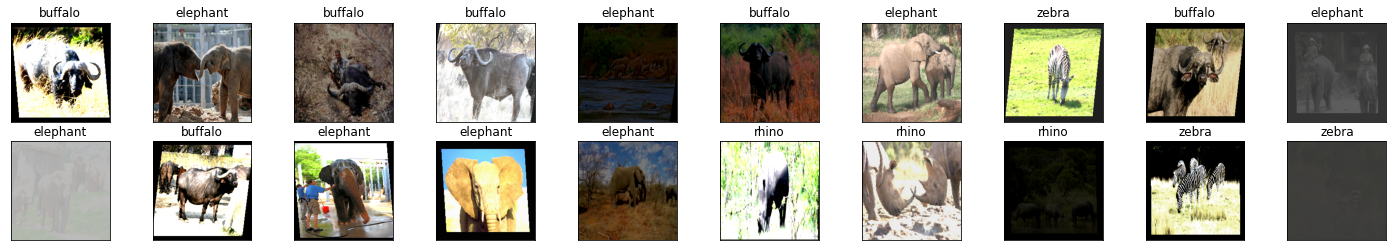

In [30]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])

In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [32]:
device

device(type='cuda', index=0)

In [34]:
model = models.mobilenet_v3_small(pretrained=True)

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


In [35]:
print(model)

MobileNetV3(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (relu): ReLU(inplace=True)
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
        )
        (2): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_r

In [36]:
for param in model.features.parameters():
    param.requires_grad = False

In [39]:
import torch.nn as nn

n_inputs = model.classifier[3].in_features # Change number, look at the latest layer!
last_layer = nn.Linear(n_inputs, len(classes))
model.classifier[3] = last_layer
model.to(device)
print(model)

MobileNetV3(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (relu): ReLU(inplace=True)
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
        )
        (2): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_r

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [42]:
%%time
epochs = 1

running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)

        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
    
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_accuracy = running_corrects.float()/len(training_loader.dataset)
    
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_accuracy)
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_accuracy = val_running_corrects.float()/len(validation_loader.dataset)
    
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_accuracy)
    print('epoch:', e)
    print('Training Loss: {:.4f}, Training Accuracy: {:.4f}, Validation Loss: {:.4f}, Validation Accuracy: {:.4f}'.format(epoch_loss, epoch_accuracy.item(), val_epoch_loss, val_epoch_accuracy.item()))

epoch: 0
Training Loss: 0.0293, Training Accuracy: 0.6952, Validation Loss: 0.0449, Validation Accuracy: 0.3225
CPU times: user 30.4 s, sys: 923 ms, total: 31.3 s
Wall time: 31.2 s


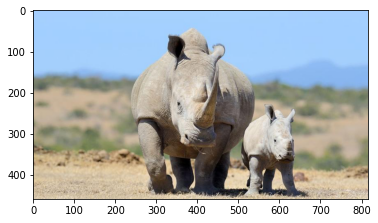

In [45]:
import requests
from PIL import Image
import PIL.ImageOps
#url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTBoi-Jsq6BR1-nogR2VankoDWnMTMzcayaLx_f9UHTPgteh_ZFA'
#response = requests.get(url, stream=True)
img = Image.open('/content/TMP/rhino/001.jpg')
plt.imshow(img)

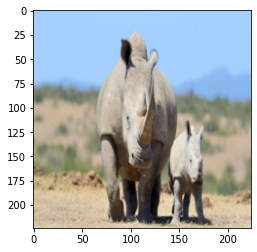

In [46]:
img = transform(img)
plt.imshow(im_convert(img))

In [47]:
image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

rhino
